In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)

In [62]:
import keras
print(keras.__version__)

3.2.1


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

# Specify the path to your dataset
file_path = '/kaggle/input/iam-handwriting-word-database'

# Read the CSV file into a DataFrame

import re

def extract_info(line):
    # Split the line into parts
    parts = line.split()

    # The first part is the identifier
    identifier = parts[0]

    # The last word in the line
    last_word = parts[-1]

    return identifier, last_word

index_dict = {}
def process_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            identifier, last_word = extract_info(line)
            index_dict[identifier] = last_word
#             print(f"Identifier: {identifier}, Last word: {last_word}")

# Path to your text file in Google Drive
# file_path = '/content/drive/My Drive/iam_words/words.txt'
# file_path = '/kaggle/input/iam-handwriting-word-database/iam_words/words.txt'
# file_path="/kaggle/input/iam-handwriting-word-database/iam_words/words.txt"
file_path="/kaggle/input/iam-handwriting-word-database/words_new.txt"

# directory_path = '/content/drive/My Drive/iam_words/words/a01/a01-000u/'

# Process the file
process_file(file_path)


# Display the first few rows of the DataFrame
# print(data.head())


In [ ]:
# file_path = '/content/drive/My Drive/iam_words/words.txt'

In [24]:
len(index_dict)

44566

In [4]:
import os
import cv2

In [5]:
def get_filename_without_extension(file_path):
    # Extract the base name (e.g., "a01-000u-00-00.png")
    base_name = os.path.basename(file_path)
    # Split the base name into name and extension
    name, _ = os.path.splitext(base_name)
    return name

In [6]:
files=['a02','a03','a04','a06','b01','b02','b03','b04','b05','b06','c01'] 

In [7]:
images=[]
labels=[]
def load_images_from_nested_folders(root_folder):
    imagesdata = []
    labelsdata = [] 
    for root, dirs, files in os.walk(root_folder):
        for filename in files:
            # Construct full file path
            img_path = os.path.join(root, filename)

            # Check if the path is a file (and not a directory)
            if os.path.isfile(img_path):
                # Read the image using OpenCV
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
                if img is not None:

                    fileid = get_filename_without_extension(filename)
                    
                     # Check if the key exists in the dictionary
                    if fileid in index_dict:
                        labeldata = index_dict[fileid]
                        imagesdata.append(img)
                        label = index_dict[fileid]
                        labelsdata.append(label)
                    else:
                        # Handle the case where the key is missing
                        print(f"Warning: Missing key '{fileid}' in index_dict.")
                        continue
                   
                    # print("filename", filename, "label", label)
    return imagesdata, labelsdata

# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Update the root_folder path
# root_folder = "/content/drive/My Drive/iam_words/words"
# root_folder="/kaggle/input/iam-handwriting-word-database/iam_words/words/a01"
images=[]
labels=[]

for i in range(len(files)):
    
    root="/kaggle/input/iam-handwriting-word-database/iam_words/words/"+files[i]
# root="/kaggle/input/iam-handwriting-word-database/iam_words/words"
    # Print the root_folder path for verification   
    # print(root_folder)        
    images1, labels1 = load_images_from_nested_folders(root)   
    
    
#     images.extend(list2)
    images=images+images1
    labels=labels+labels1

In [8]:
len(images)  

16002

In [9]:
df = pd.DataFrame({
    'Column1': images,
    'Column2': labels
})

In [10]:
df

,Column1,Column2
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",told
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",man
2,"[[153, 163, 163, 204, 231, 231], [116, 128, 13...",""""
3,"[[160, 163, 231, 244, 231, 244, 244, 245, 245,...",he
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Nkrumah's
...,...,...
15997,"[[245, 245, 245, 255, 245, 255, 255, 255, 245,...",""""
15998,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",on
15999,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",This
16000,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Auden


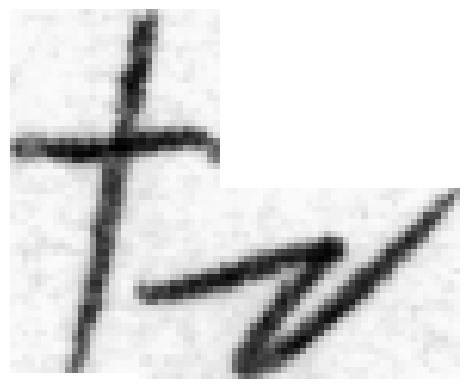

In [11]:
import matplotlib.pyplot as plt
# import cv2

# Load grayscale image using OpenCV
# image = cv2.imread(images[0], cv2.IMREAD_GRAYSCALE)

# Display the image using matplotlib
plt.imshow(images[100], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()


In [57]:
labels[100]       

'to'

In [12]:
import cv2
import numpy as np

def preprocess_image(image, target_size=(128, 128)):
    target_height, target_width = target_size

    # Get original dimensions
    original_height, original_width = image.shape

    # Calculate the scaling factor and resize dimensions
    scale = min(target_width / original_width, target_height / original_height)
    new_width = int(original_width * scale)
    new_height = int(original_height * scale)

    # Resize the image with maintaining the aspect ratio
    resized_image = cv2.resize(image, (new_width, new_height))

    # Create a new image with the target size and fill with white (255)
    padded_image = np.full((target_height, target_width), 255, dtype=np.uint8)

    # Calculate padding
    pad_top = (target_height - new_height) // 2
    pad_left = (target_width - new_width) // 2

    # Place the resized image in the center
    padded_image[pad_top:pad_top + new_height, pad_left:pad_left + new_width] = resized_image

    # Normalize the image (convert pixel values to range [0, 1])
    normalized_image = padded_image / 255.0

    return normalized_image 

In [13]:
def preprocessImages(images):
    prepro_images=[]
    for i in range(0,len(images)):
        prepro_images.append(preprocess_image(images[i]))
    return prepro_images

In [14]:
df['Column1']

0        [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1        [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
2        [[153, 163, 163, 204, 231, 231], [116, 128, 13...
3        [[160, 163, 231, 244, 231, 244, 244, 245, 245,...
4        [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
                               ...                        
15997    [[245, 245, 245, 255, 245, 255, 255, 255, 245,...
15998    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
15999    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
16000    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
16001    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
Name: Column1, Length: 16002, dtype: object

In [14]:
preprocess_images=preprocessImages(df['Column1']) 

In [15]:
preprocess_images[0].shape  

(128, 128)

In [16]:

from sklearn.model_selection import train_test_split

In [17]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(preprocess_images, labels, test_size=0.2, random_state=42)

In [18]:

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [19]:
X_train.shape

(12801, 128, 128)

In [20]:
# Expand dimensions to add a single channel
X_train_expanded = np.expand_dims(X_train, axis=-1)

# Replicate the single channel 3 times to create an RGB-like image
X_train_rgb = np.repeat(X_train_expanded, 3, axis=-1)

In [21]:
X_test_expanded = np.expand_dims(X_test, axis=-1)

# Replicate the single channel 3 times to create an RGB-like image
X_test_rgb = np.repeat(X_test_expanded, 3, axis=-1)

In [24]:
X_train_rgb.shape

(12801, 128, 128, 3)

In [25]:
X_test_rgb.shape

(3201, 128, 128, 3)

In [ ]:
# Testining with different pre-trained models

 MobileNetV2 as CNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM, TimeDistributed
from tensorflow.keras.applications import MobileNetV2,VGG16
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming y_train and y_test are your transcriptions (encoded as sequences)

# Initialize the tokenizer (if not already done)
tokenizer = Tokenizer(char_level=True, lower=True)  # Char-level tokenization
tokenizer.fit_on_texts(y_train)

# Convert transcriptions to sequences
y_train_seq = tokenizer.texts_to_sequences(y_train)
y_test_seq = tokenizer.texts_to_sequences(y_test)

# Pad sequences to ensure uniform input size
max_seq_length = max(max(len(seq) for seq in y_train_seq), max(len(seq) for seq in y_test_seq))
y_train_padded = pad_sequences(y_train_seq, maxlen=max_seq_length, padding='post')
y_test_padded = pad_sequences(y_test_seq, maxlen=max_seq_length, padding='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the padding token

# Reshape y_train and y_test to match the required shape for sparse_categorical_crossentropy
y_train_padded = np.expand_dims(y_train_padded, axis=-1)
y_test_padded = np.expand_dims(y_test_padded, axis=-1)

# Load the MobileNetV2 model with pretrained weights
pretrained_cnn = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# pretrained_cnn = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Extract features from preprocessed images using MobileNetV2
features_train = pretrained_cnn.predict(X_train_rgb)
features_test = pretrained_cnn.predict(X_test_rgb)

# Flatten the feature vectors
features_train_flattened = features_train.reshape(features_train.shape[0], -1)
features_test_flattened = features_test.reshape(features_test.shape[0], -1)

# Input layer for features
input_features = Input(shape=(features_train_flattened.shape[1],))

# Expand dimensions to match LSTM input requirements
expanded_features = Dense(256, activation='relu')(input_features)

# Repeat vector to create sequences
sequence_input = tf.expand_dims(expanded_features, axis=1)
sequence_input = tf.tile(sequence_input, [1, max_seq_length, 1])

# One BLSTM layer
blstm = Bidirectional(LSTM(128, return_sequences=True))(sequence_input)

# Output layer (TimeDistributed to predict each character)
output = TimeDistributed(Dense(vocab_size, activation='softmax'))(blstm)

# Define the model
model = Model(inputs=input_features, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

121/121 [==============================] - 58s 471ms/step

31/31 [==============================] - 10s 307ms/step

Model: "model_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_4 (InputLayer)        [(None, 20480)]           0         

                                                                 

 dense_2 (Dense)             (None, 256)               5243136   

                                                                 

 tf.expand_dims_1 (TFOpLamb  (None, 1, 256)            0         

 da)                                                             

                                                                 

 tf.tile_1 (TFOpLambda)      (None, 16, 256)           0         

                                                                 

 bidirectional_1 (Bidirecti  (None, 16, 256)           394240    

 onal)                                                       

In [ ]:
# Train the model
history = model.fit(
    features_train_flattened, y_train_padded,
    validation_data=(features_test_flattened, y_test_padded),
    epochs=100,  # Adjust the number of epochs as necessary
    batch_size=16  # Adjust the batch size as necessary
)

# Evaluate the model on the test set
evaluation = model.evaluate(features_test_flattened, y_test_padded)
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

Epoch 1/100

242/242 [==============================] - 35s 125ms/step - loss: 1.2039 - accuracy: 0.7168 - val_loss: 1.1886 - val_accuracy: 0.7263

Epoch 2/100

242/242 [==============================] - 30s 126ms/step - loss: 0.9855 - accuracy: 0.7414 - val_loss: 0.8916 - val_accuracy: 0.7534

Epoch 3/100

242/242 [==============================] - 30s 124ms/step - loss: 0.8518 - accuracy: 0.7638 - val_loss: 0.8998 - val_accuracy: 0.7511

Epoch 4/100

242/242 [==============================] - 32s 132ms/step - loss: 0.7846 - accuracy: 0.7786 - val_loss: 0.8116 - val_accuracy: 0.7791

Epoch 5/100

242/242 [==============================] - 30s 125ms/step - loss: 0.7219 - accuracy: 0.7921 - val_loss: 0.7717 - val_accuracy: 0.7787

Epoch 6/100

242/242 [==============================] - 30s 123ms/step - loss: 0.6803 - accuracy: 0.8041 - val_loss: 0.7645 - val_accuracy: 0.7878

Epoch 7/100

242/242 [==============================] - 29s 121ms/step - loss: 0.6322 - accuracy: 0.8149 - val_l

using ResNet101V2 as ccn Layer



TESTING


MODEL

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM, TimeDistributed
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import RepeatVector

# Assuming y_train and y_test are your transcriptions (encoded as sequences)

# Initialize the tokenizer (if not already done)
tokenizer = Tokenizer(char_level=True, lower=True)  # Char-level tokenization
tokenizer.fit_on_texts(y_train)

# Convert transcriptions to sequences
y_train_seq = tokenizer.texts_to_sequences(y_train)
y_test_seq = tokenizer.texts_to_sequences(y_test)

# Pad sequences to ensure uniform input size
max_seq_length = max(max(len(seq) for seq in y_train_seq), max(len(seq) for seq in y_test_seq))
y_train_padded = pad_sequences(y_train_seq, maxlen=max_seq_length, padding='post')
y_test_padded = pad_sequences(y_test_seq, maxlen=max_seq_length, padding='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the padding token

# Reshape y_train and y_test to match the required shape for sparse_categorical_crossentropy
y_train_padded = np.expand_dims(y_train_padded, axis=-1)
y_test_padded = np.expand_dims(y_test_padded, axis=-1)

# Load the MobileNetV2 model with pretrained weights
# pretrained_cnn = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

pretrained_cnn = ResNet101V2(weights='imagenet', include_top=False, input_shape=(128,32, 3))

# Extract features from preprocessed images using MobileNetV2
features_train = pretrained_cnn.predict(X_train_rgb)
features_test = pretrained_cnn.predict(X_test_rgb)

# Flatten the feature vectors
features_train_flattened = features_train.reshape(features_train.shape[0], -1)
features_test_flattened = features_test.reshape(features_test.shape[0], -1)

# Input layer for features
input_features = Input(shape=(features_train_flattened.shape[1],))

# Expand dimensions to match LSTM input requirements
expanded_features = Dense(256, activation='relu')(input_features)


# Add BatchNormalization after Dense layer
expanded_features = BatchNormalization()(expanded_features)


# from tensorflow import keras

# Create a Keras tensor
# input_tensor = keras.Input(shape=(32,))

# # Apply a Keras layer (e.g., Dense)
# output_tensor = keras.layers.Dense(10)(input_tensor)

# ... (Rest of your Keras model)



# ... (Rest of your code)

# Expand dimensions using Reshape layer
sequence_input = Reshape((1, expanded_features.shape[-1]))(expanded_features)


# ... (Rest of your code)
sequence_input = Reshape((256,))(sequence_input)
# Repeat the sequence using RepeatVector layer
sequence_input = RepeatVector(max_seq_length)(sequence_input)


# Repeat vector to create sequences
# sequence_input = tf.expand_dims(expanded_features, axis=1)
# sequence_input = tf.tile(sequence_input, [1, max_seq_length, 1])

# One BLSTM layer
blstm = Bidirectional(LSTM(128, return_sequences=True ,kernel_regularizer=l2(0.01)))(sequence_input)
dropout = Dropout(0.5)(blstm)
# Output layer (TimeDistributed to predict each character)
output = TimeDistributed(Dense(vocab_size, activation='softmax'))(dropout)

# Define the model
model = Model(inputs=input_features, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary() 

2024-05-28 14:32:27.085267: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 14:32:27.085395: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 14:32:27.216594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
  9/190 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step 

I0000 00:00:1716906771.863600     165 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 18, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 18, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 18, 50)         │        12,850 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,505,522 (9.56 MB)

 Trainable params: 2,505,010 (9.56 MB)

 Non-trainable params: 512 (2.00 KB)

In [38]:
sequence_input.shape

(None, 18, 256)

In [39]:
# Train the model
#ResNet101V2
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Verbosity mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

history = model.fit(
    features_train_flattened, y_train_padded,
    validation_data=(features_test_flattened, y_test_padded),
    epochs=100           ,  # Adjust the number of epochs as necessary
    batch_size=16 , # Adjust the batch size as necessary
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
evaluation = model.evaluate(features_test_flattened, y_test_padded)
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

Epoch 1/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6998 - loss: 3.6270 - val_accuracy: 0.7753 - val_loss: 0.8656
Epoch 2/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7720 - loss: 0.8897 - val_accuracy: 0.7762 - val_loss: 0.8754
Epoch 3/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7683 - loss: 0.9840 - val_accuracy: 0.7783 - val_loss: 0.8478
Epoch 4/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7762 - loss: 0.8740 - val_accuracy: 0.7804 - val_loss: 0.8499
Epoch 5/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7811 - loss: 0.8422 - val_accuracy: 0.7830 - val_loss: 0.8183
Epoch 6/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7825 - loss: 0.8322 - val_accuracy: 0.7856 - val_loss: 0.8052
Epoch 7/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7849 - loss: 0.8144 - val_accuracy: 0.7845 - val_loss: 0.8091
Epoch 8/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7847 - loss: 0.8206 - 

**Saving Tokenizer**

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(char_level=True, lower=True)  # Char-level tokenization
tokenizer.fit_on_texts(y_train)  

2024-05-29 13:29:38.120458: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 13:29:38.120586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 13:29:38.267763: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [60]:
#pre-ver : 2.15.0
import tensorflow
print(tensorflow.__version__) 

2.15.0


In [30]:
(tokenizer).index_word

{1: 'e',
 2: 't',
 3: 'a',
 4: 'o',
 5: 'i',
 6: 'n',
 7: 'r',
 8: 's',
 9: 'h',
 10: 'l',
 11: 'd',
 12: 'c',
 13: 'm',
 14: 'u',
 15: 'p',
 16: 'f',
 17: 'g',
 18: 'w',
 19: 'b',
 20: 'y',
 21: '.',
 22: 'v',
 23: ',',
 24: 'k',
 25: '"',
 26: '-',
 27: '0',
 28: "'",
 29: 'x',
 30: 'j',
 31: '1',
 32: 'q',
 33: ':',
 34: '3',
 35: '9',
 36: '5',
 37: 'z',
 38: '?',
 39: '8',
 40: '6',
 41: ';',
 42: '#',
 43: '4',
 44: '(',
 45: '2',
 46: '!',
 47: ')',
 48: '7',
 49: '*'}

In [42]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved to tokenizer.pickle")   

Tokenizer saved to tokenizer.pickle


In [34]:
# saving resnet
from tensorflow.keras.applications import ResNet101V2
pretrained_cnn = ResNet101V2(weights='imagenet', include_top=False, input_shape=(128,128, 3))
pretrained_cnn.save('resnetmodel.keras') 

171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


MODEL1

In [32]:
X_train_rgb.shape

(12801, 128, 128, 3)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM, TimeDistributed
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import RepeatVector

# Assuming y_train and y_test are your transcriptions (encoded as sequences)

# Initialize the tokenizer (if not already done)
tokenizer = Tokenizer(char_level=True, lower=True)  # Char-level tokenization
tokenizer.fit_on_texts(y_train)

# Convert transcriptions to sequences
y_train_seq = tokenizer.texts_to_sequences(y_train)
y_test_seq = tokenizer.texts_to_sequences(y_test)

# Pad sequences to ensure uniform input size
max_seq_length = max(max(len(seq) for seq in y_train_seq), max(len(seq) for seq in y_test_seq))
y_train_padded = pad_sequences(y_train_seq, maxlen=max_seq_length, padding='post')
y_test_padded = pad_sequences(y_test_seq, maxlen=max_seq_length, padding='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the padding token

# Reshape y_train and y_test to match the required shape for sparse_categorical_crossentropy
y_train_padded = np.expand_dims(y_train_padded, axis=-1)
y_test_padded = np.expand_dims(y_test_padded, axis=-1)

# Load the MobileNetV2 model with pretrained weights
# pretrained_cnn = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

pretrained_cnn = ResNet101V2(weights='imagenet', include_top=False, input_shape=(128,128, 3))

# Extract features from preprocessed images using MobileNetV2
features_train = pretrained_cnn.predict(X_train_rgb)
features_test = pretrained_cnn.predict(X_test_rgb)

# Flatten the feature vectors
features_train_flattened = features_train.reshape(features_train.shape[0], -1)
features_test_flattened = features_test.reshape(features_test.shape[0], -1)

# Input layer for features
input_features = Input(shape=(features_train_flattened.shape[1],))

# Expand dimensions to match LSTM input requirements
expanded_features = Dense(256, activation='relu')(input_features)


# Add BatchNormalization after Dense layer
expanded_features = BatchNormalization()(expanded_features)

# Expand dimensions using Reshape layer
sequence_input = Reshape((1, expanded_features.shape[-1]))(expanded_features)


# ... (Rest of your code)
sequence_input = Reshape((256,))(sequence_input)
# Repeat the sequence using RepeatVector layer
sequence_input = RepeatVector(max_seq_length)(sequence_input)


# Repeat vector to create sequences
# sequence_input = tf.expand_dims(expanded_features, axis=1)
# sequence_input = tf.tile(sequence_input, [1, max_seq_length, 1])

# One BLSTM layer
blstm = Bidirectional(LSTM(128, return_sequences=True ,kernel_regularizer=l2(0.01)))(sequence_input)
dropout1 = Dropout(0.5)(blstm)

# Second BLSTM layer
blstm2 = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))(dropout1)


# dropout = Dropout(0.5)(blstm)
# Output layer (TimeDistributed to predict each character)
output = TimeDistributed(Dense(vocab_size, activation='softmax'))(blstm2)

# Define the model
model1 = Model(inputs=input_features, outputs=output)

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model1.summary() 

In [26]:
# Train the model
#ResNet101V2
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Verbosity mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

history = model1.fit(
    features_train_flattened, y_train_padded,
    validation_data=(features_test_flattened, y_test_padded),
    epochs=100           ,  # Adjust the number of epochs as necessary
    batch_size=16 , # Adjust the batch size as necessary
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
evaluation = model1.evaluate(features_test_flattened, y_test_padded)
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")  

Epoch 1/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7448 - loss: 3.3779 - val_accuracy: 0.7793 - val_loss: 0.8092
Epoch 2/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7796 - loss: 0.8186 - val_accuracy: 0.7893 - val_loss: 0.8021
Epoch 3/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7875 - loss: 0.8040 - val_accuracy: 0.8006 - val_loss: 0.7445
Epoch 4/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7925 - loss: 0.7735 - val_accuracy: 0.8009 - val_loss: 0.7740
Epoch 5/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7984 - loss: 0.7633 - val_accuracy: 0.8046 - val_loss: 0.7262
Epoch 6/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8036 - loss: 0.7244 - val_accuracy: 0.8090 - val_loss: 0.7072
Epoch 7/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8028 - loss: 0.7475 - val_accuracy: 0.8100 - val_loss: 0.7090
Epoch 8/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8072 - loss: 0

In [27]:
# features_test_flattened[0].shape  
single_value=features_test_flattened[0]
single_value.shape

(32768,)

In [29]:
prediction=model1.predict(features_test_flattened)      

101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


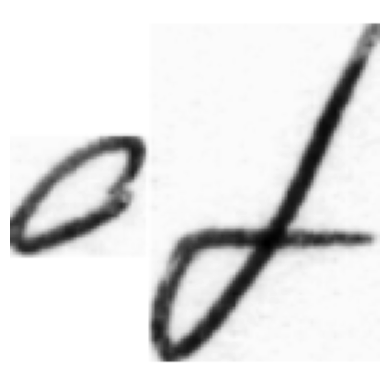

In [36]:
import matplotlib.pyplot as plt

# Read the grayscale image
# image_gray = cv2.imread('grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

# Display the grayscale image
plt.imshow(X_test[0], cmap='gray')       
plt.axis('off')  # Turn off axis labels
plt.show()

In [30]:
# predict
def decode_predictions(predictions, tokenizer):
    decoded_words = []
    for pred in predictions:
        # Convert each time step's probabilities into character indices
        character_indices = [np.argmax(step) for step in pred]
#         print(character_indices)
        # Decode character indices into characters using the tokenizer
        characters = [tokenizer.index_word.get(idx, '') for idx in character_indices]
#         print(characters)
        # Combine characters into words based on spaces (assuming space-separated words)
        word = ''.join(characters).strip()  # Combine characters into a word
        decoded_words.append(word)
    return decoded_words

# Decode predictions into words
decoded_words = decode_predictions(prediction, tokenizer)

# Print the decoded words
for word in decoded_words:
    print(word)   

of
coceeainn
wit
coaee
seriig
waee
beee
of
.
siiiiie
the
miiiiiiin
cocmeeeeen
mo
a
in
mr
in
coneeiiiii
seiiiig
aany
thit
"
,
coceeeee
that
ciiiiiiiin
maany
wase
ii
,
the
coreeiee
gooe
,
the
to
waayy
to
ceeeeee
cereee
setiiiee
"
,
it
wese
peree
gore
an
cocmeeee
the
.
coreen
,
of
that
coneeiee
beee
,
goceeeen
aad
coceeee
of
on
wany
teeeee
was
the
is
it
tiiie
comeee
aon
.
oo
to
that
he
a
poriie
byy
wale
.
,
of
comeaann
gopeeee
cannaagg
waaee
.
ceaeang
on
the
a
wit
ber
popeeie
a
a
o
waee
gooe
the
aan
ceeeeiiii
is
a
,
for
goree
in
poree
ceeeee
hes
the
gopeeee
it
of
io
for
thie
to
in
an
,
be
to
beee
,
coneeee
miiiiiii
wat
siiiiiie
.
gore
seiiii
of
poreeeee
hee
gore
in
ceaee
sit
on
to
mrt
and
,
the
hhs
.
cone
oor
for
cone
forie
the
foree
seiiiiii
ceaeag
,
of
copeeeiin
haaee
ceneiig
was
or
coneee
the
it
coeeeiie
to
a
for
was
periiie
of
a
por
a
poree
.
coreeee
hh
miiiie
the
miiiiiie
waaeee
to
comeeaiinn
commeeee
tor
,
sete
.
for
beee
conee
oo
ceany
seriii
coceeee
an
that
frrt
mr
thet
,
wany
of


In [43]:
model1.save('mynewmodel.keras') 

In [76]:
model1.save('model2.keras')